[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

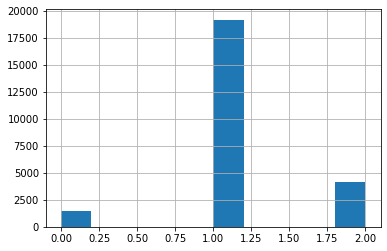

In [0]:

import pandas as pd
import numpy as np
import pickle
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn
import spacy #pos tagging nltk
import nltk
nltk.download('stopwords')

import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline

df = pd.read_csv("labeled_data.csv")
df.loc[1]['tweet']
#df.loc[1]
df.count
df['class'].hist()
df.describe()

tweets=df.tweet

tweets


In [0]:
stopwords=stopwords = nltk.corpus.stopwords.words("english")

other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

stemmer = PorterStemmer()


def preprocess(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    return parsed_text

def tokenize(tweet):
    """Removes punctuation & excess whitespace, sets to lowercase,
    and stems tweets. Returns a list of stemmed tokens."""
    tweet = " ".join(re.split("[^a-zA-Z]*", tweet.lower())).strip()
    tokens = [stemmer.stem(t) for t in tweet.split()]
    return tokens

def basic_tokenize(tweet):
    """Same as tokenize but without the stemming"""
    tweet = " ".join(re.split("[^a-zA-Z.,!?]*", tweet.lower())).strip()
    return tweet.split()

vectorizer = TfidfVectorizer(
    tokenizer=tokenize,
    preprocessor=preprocess,
    ngram_range=(1, 3),
    stop_words=stopwords,
    use_idf=True,
    smooth_idf=True,
    norm=None,
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.75
    )


tfidf = vectorizer.fit_transform(tweets).toarray()

/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


**Creating training and test data**

In [0]:
X = pd.DataFrame(tfidf)
y = df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [0]:

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([    
        ('gaussian', GaussianNB()) 
    ])
grid_search = GridSearchCV(pipe, 
                           [{}],
                           cv=StratifiedKFold(n_splits=5, 
                                              random_state=1).split(X_train, y_train), 
                           verbose=2)
model = grid_search.fit(X_train, y_train)

y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

**Guassian Classifier**

In [0]:

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([    
        ('gaussian', GaussianNB()) 
    ])
grid_search = GridSearchCV(pipe, 
                           [{}],
                           cv=StratifiedKFold(n_splits=5, 
                                              random_state=1).split(X_train, y_train), 
                           verbose=2)
model = grid_search.fit(X_train, y_train)

y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   3.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV] ................................................. , total=   2.9s
[CV]  ................................................................
[CV] ................................................. , total=   3.1s
[CV]  ................................................................
[CV] ................................................. , total=   3.2s
[CV]  ................................................................
[CV] ................................................. , total=   3.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.5s finished


              precision    recall  f1-score   support

           0       0.11      0.35      0.16       164
           1       0.90      0.70      0.79      1905
           2       0.57      0.62      0.59       410

    accuracy                           0.67      2479
   macro avg       0.52      0.56      0.51      2479
weighted avg       0.79      0.67      0.72      2479



In [0]:

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([    
        ('gaussian', GaussianNB(var_smoothing =0.000000000000000000001)) 
    ])
grid_search = GridSearchCV(pipe, 
                           [{}],
                           cv=StratifiedKFold(n_splits=5, 
                                              random_state=1).split(X_train, y_train), 
                           verbose=2)
model = grid_search.fit(X_train, y_train)

y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   2.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] ................................................. , total=   2.8s
[CV]  ................................................................
[CV] ................................................. , total=   2.8s
[CV]  ................................................................
[CV] ................................................. , total=   2.8s
[CV]  ................................................................
[CV] ................................................. , total=   2.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.1s finished


              precision    recall  f1-score   support

           0       0.11      0.35      0.16       164
           1       0.90      0.70      0.79      1905
           2       0.56      0.61      0.59       410

    accuracy                           0.66      2479
   macro avg       0.52      0.55      0.51      2479
weighted avg       0.79      0.66      0.71      2479



In [0]:
import numpy as np
import math
from numpy.linalg import svd
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.decomposition as skd

def truncated_svd(input,svd_components):
    
  truncated = skd.TruncatedSVD(n_components=svd_components)
    
  return truncated.fit_transform(input)


tfidf = truncated_svd(tfidf,100)

In [0]:
classes_ = np.sort(np.unique(y))
classes_
data = [X_train[y == yi] for yi in classes_]
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


[       0     1     2     3     4     5     ...  7080  7081  7082  7083  7084  7085
 22524   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
 23316   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
 17134   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
 18483   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
 24430   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
 ...     ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
 16448   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
 11653   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
 8226    0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
 23897   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
 11284   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.

In [0]:
bandwidths = 10 ** np.linspace(0, 2, 100)
bandwidths

array([  1.        ,   1.04761575,   1.09749877,   1.149757  ,
         1.20450354,   1.26185688,   1.32194115,   1.38488637,
         1.45082878,   1.51991108,   1.59228279,   1.66810054,
         1.7475284 ,   1.83073828,   1.91791026,   2.009233  ,
         2.10490414,   2.20513074,   2.3101297 ,   2.42012826,
         2.53536449,   2.65608778,   2.7825594 ,   2.91505306,
         3.05385551,   3.19926714,   3.35160265,   3.51119173,
         3.67837977,   3.85352859,   4.03701726,   4.22924287,
         4.43062146,   4.64158883,   4.86260158,   5.09413801,
         5.33669923,   5.59081018,   5.85702082,   6.13590727,
         6.42807312,   6.73415066,   7.05480231,   7.39072203,
         7.74263683,   8.11130831,   8.49753436,   8.90215085,
         9.32603347,   9.77009957,  10.23531022,  10.72267222,
        11.23324033,  11.76811952,  12.32846739,  12.91549665,
        13.53047775,  14.17474163,  14.84968262,  15.55676144,
        16.29750835,  17.07352647,  17.88649529,  18.73